In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [6]:
x_train.shape

(160,)

## Simple Linear Regression using Maths and Python

In [7]:
class LinearRegression:    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        return self.m * X_test + self.b

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)

0.5742564727019197
-1.0270069374542108


In [10]:
y_pred = lr.predict(x_test)

In [11]:
mse_python_model = mean_absolute_error(y_test,y_pred)
print('Mse:{}'.format(mse_python_model))

Mse:0.23150985393278373


In [12]:
y_test.shape

(40,)

In [13]:
y_pred.shape

(40,)

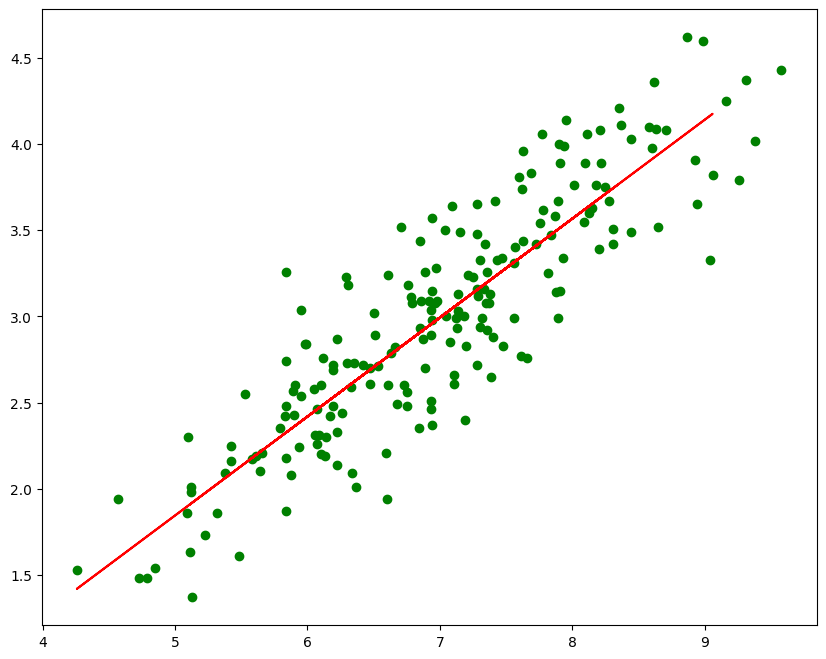

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,color='green')
plt.plot(x_test,y_pred,color='red')
plt.show()

## Simple Linear Regression using Sklearn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_1 = LinearRegression()

In [17]:
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train)

In [18]:
lr_1.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lr_1.coef_

array([0.57425647])

In [20]:
lr_1.intercept_

np.float64(-1.0270069374542108)

In [21]:
x_test = x_test.reshape(-1,1)
x_test.shape

(40, 1)

In [22]:
y_pred_1 = lr_1.predict(x_test)

In [23]:
mse_sklearn_model = mean_absolute_error(y_test,y_pred)
print('MSE: {}'.format(mse_sklearn_model))

MSE: 0.23150985393278373


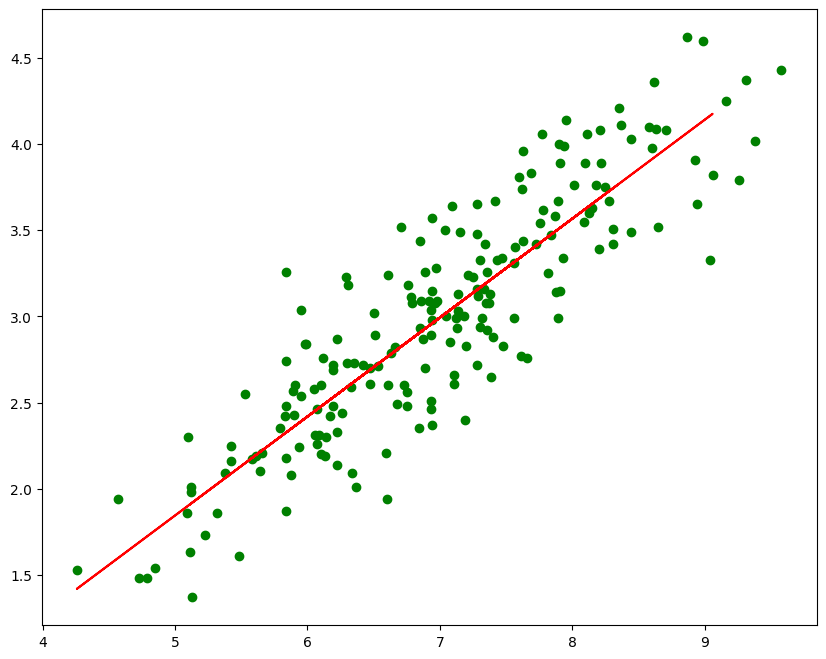

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,color='green')
plt.plot(x_test,y_pred_1,color='red')
plt.show()

## Compair both model mse

In [25]:
df = pd.DataFrame({
    'model': ['python_model', 'sklearn_model'],
    'accuracy': [mse_python_model, mse_sklearn_model]
})

In [26]:
df.style.background_gradient(sns.color_palette("YlOrBr", as_cmap=True))

,model,accuracy
0,python_model,0.231510
1,sklearn_model,0.231510
